Question 8: Logistic Regression with L1 Regularization<br>
Task: Implement logistic regression with L1 regularization and observe the effect on feature selection.

Feature coefficients:

mean radius: 0.0000
mean texture: 0.0000
mean perimeter: 0.0000
mean area: 0.0000
mean smoothness: 0.0000
mean compactness: 0.0000
mean concavity: 0.0000
mean concave points: -2.4370
mean symmetry: 0.0172
mean fractal dimension: 0.0000
radius error: -2.4701
texture error: 0.3846
perimeter error: 0.0000
area error: 0.0000
smoothness error: -0.4328
compactness error: 0.8941
concavity error: 0.0000
concave points error: 0.0000
symmetry error: 0.4600
fractal dimension error: 0.2775
worst radius: -0.7628
worst texture: -1.8542
worst perimeter: 0.0000
worst area: -3.1223
worst smoothness: -0.1659
worst compactness: 0.0000
worst concavity: -1.2985
worst concave points: 0.0000
worst symmetry: -1.0324
worst fractal dimension: 0.0000

Number of features with zero coefficients: 16 out of 30

Training Accuracy: 0.989
Test Accuracy: 0.974


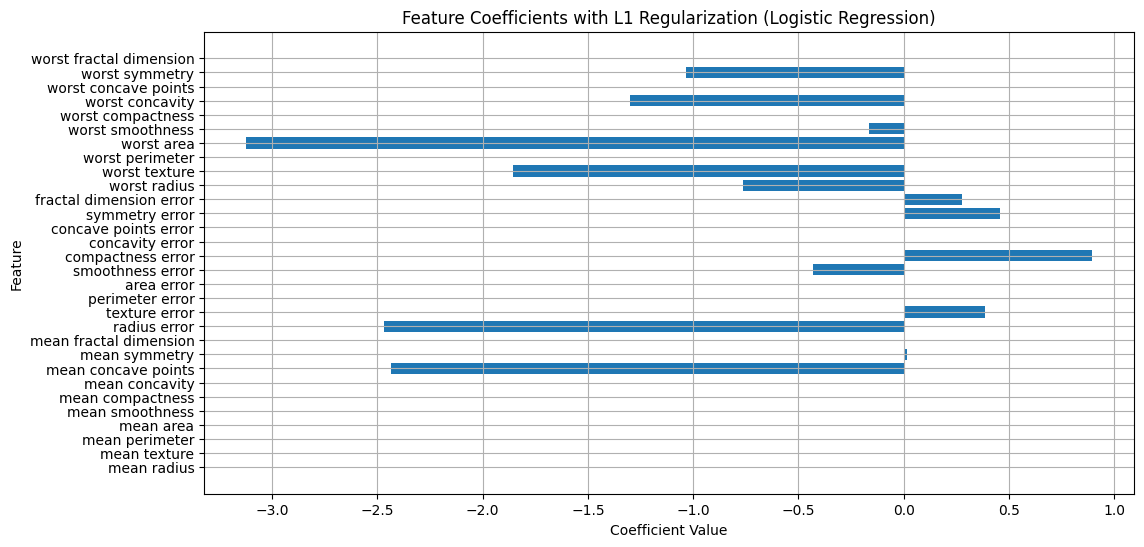

In [1]:
# 🧰 Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 📥 Load Dataset (Breast Cancer - binary classification)
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# 🧪 Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔄 Scale Features (important for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🧠 Logistic Regression with L1 Regularization (Lasso)
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42)
model_l1.fit(X_train_scaled, y_train)

# 📊 Coefficients & Feature Selection
coef = model_l1.coef_[0]
print("Feature coefficients:\n")
for feature, c in zip(feature_names, coef):
    print(f"{feature}: {c:.4f}")

# Count how many features are zeroed out (ignored)
zero_coef_count = sum(coef == 0)
print(f"\nNumber of features with zero coefficients: {zero_coef_count} out of {len(coef)}")

# 🧮 Model Performance
train_score = model_l1.score(X_train_scaled, y_train)
test_score = model_l1.score(X_test_scaled, y_test)
print(f"\nTraining Accuracy: {train_score:.3f}")
print(f"Test Accuracy: {test_score:.3f}")

# 📉 Plot Feature Coefficients
plt.figure(figsize=(12,6))
plt.barh(feature_names, coef)
plt.title("Feature Coefficients with L1 Regularization (Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(True)
plt.show()
